In [10]:
import easyocr
import cv2 
import pandas as pd 
import matplotlib.pyplot as plt 
import imutils
import numpy  as np 

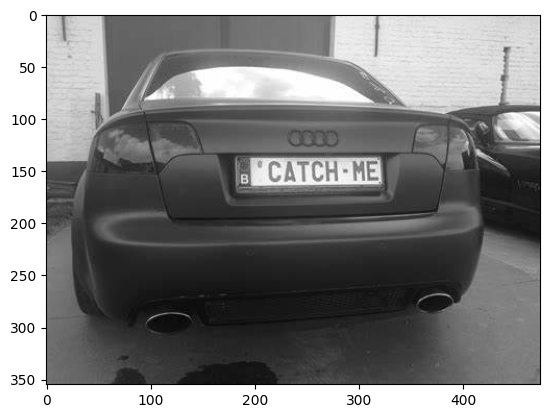

In [11]:
img = cv2.imread('car.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB))

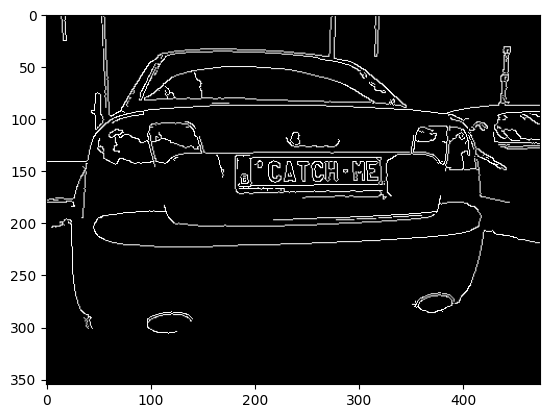

In [16]:
bfilter = cv2.bilateralFilter(gray,11,17,17) # Noise Reduction
edged = cv2.Canny(bfilter,30,200)
plt.imshow(cv2.cvtColor(edged,cv2.COLOR_BGR2RGB))

In [17]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contourss = imutils.grab_contours(keypoints)
contours = sorted(contourss, key=cv2.contourArea, reverse=True)[:10]
len(contours)

10

In [18]:
location = None 

for contour in contours:
    approx = cv2.approxPolyDP(contour,10,True)
    if len(approx) == 4:
        location = approx
        break 
len(location)

4

In [19]:
location

array([[[196, 139]],

       [[316, 137]],

       [[321, 159]],

       [[197, 164]]], dtype=int32)

In [20]:
mask = np.zeros(gray.shape,np.uint8)
new_image = cv2.drawContours(mask,[location],-1,255,-1)
new_image = cv2.bitwise_and(img,img,mask=mask)

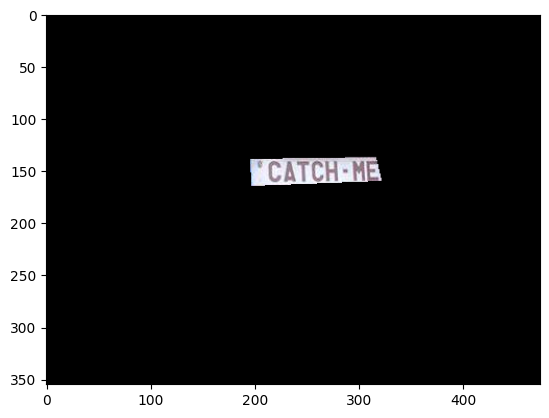

In [21]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))


In [22]:
(x,y) = np.where(mask==255)
(x1,y1) = (np.min(x) , np.min(y))
(x2,y2) = (np.max(x),np.max(y))
cropped_image = gray[x1:x2+1,y1:y2+2]

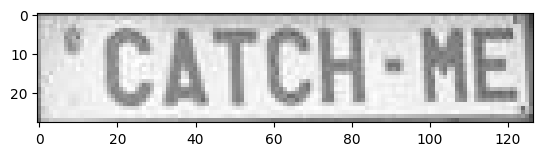

In [23]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))


In [29]:
# 
reader = easyocr.Reader(['en'])
# result = reader.readtext(cropped_image)
# result

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [33]:
# result = reader.readtext(cropped_image)

In [34]:
from PIL import Image
import easyocr

try:
    reader = easyocr.Reader(['en'])
    result = reader.readtext(cropped_image)
    print(result)
except AttributeError as e:
    if 'ANTIALIAS' in str(e):
        print("Encountered ANTIALIAS error. Try updating Pillow or handling differently.")
    else:
        raise

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Encountered ANTIALIAS error. Try updating Pillow or handling differently.


In [41]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


AttributeError: module 'PIL.Image' has no attribute 'ANTIALIAS'

In [42]:

# text = result[0][-2]
# font = cv2.FONT_HERSHEY_SIMPLEX
# res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
# res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
# plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))